# Libraries to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [2]:
eda = pd.read_csv('amz_uk_price_prediction_dataset.csv')
eda

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [3]:
# Generate the frequency table for the category column
category_frequency = eda['category'].value_counts()

In [4]:
# Top 5 listed product categories
top_categories = category_frequency.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

c:\Users\lualg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


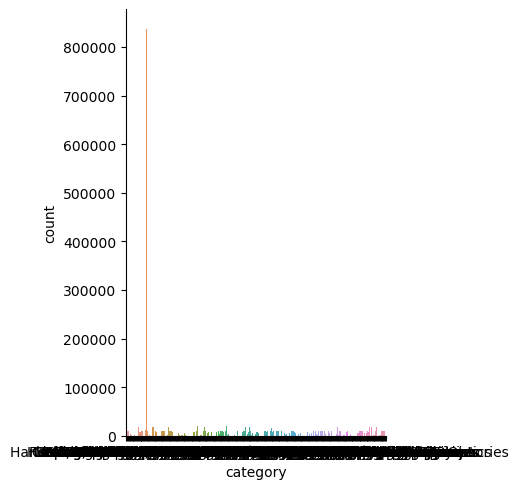

In [5]:
# Display the distribution of products
sns.catplot(data=eda, x='category', kind='count')

<Axes: ylabel='count'>

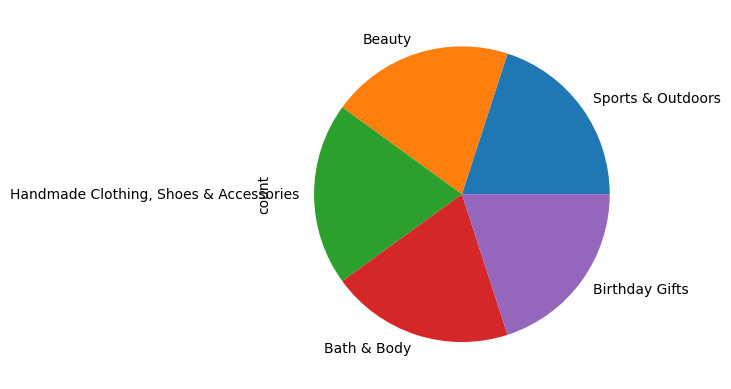

In [6]:
# Subset of the top categories
category_frequency.head(5).index.value_counts().plot.pie()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [7]:
# Calculating the mean
mean_price = eda['price'].mean()
print(f'The Mean price is: {mean_price}')

# Calculating the median
median_price = eda['price'].median()
print(f'The Median price is: {median_price}')

# Calculating the mode
mode_price = eda['price'].mode()
print(f'The Mode price is: {mode_price.loc[0]}')

The Mean price is: 89.24380943923663
The Median price is: 19.09
The Mode price is: 9.99


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [8]:
# Determining the variance
var_price = eda['price'].var()
print(f"The Variance is: {var_price}")

# Determining the standard deviation
standar_dev_price = eda['price'].std()
print(f"The Standar Deviation is: {standar_dev_price}")

# Determining the range
range_price = eda['price'].max() - eda['price'].min()
print(f"The Range is : {range_price}")

# Determining the interquatile range
quantile_price = eda['price'].quantile(0.75) - eda['price'].quantile(0.25)
print(f"The Interquartile range is: {quantile_price}")

The Variance is: 119445.48532256528
The Standar Deviation is: 345.60886175352226
The Range is : 100000.0
The Interquartile range is: 36.0


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

<Axes: >

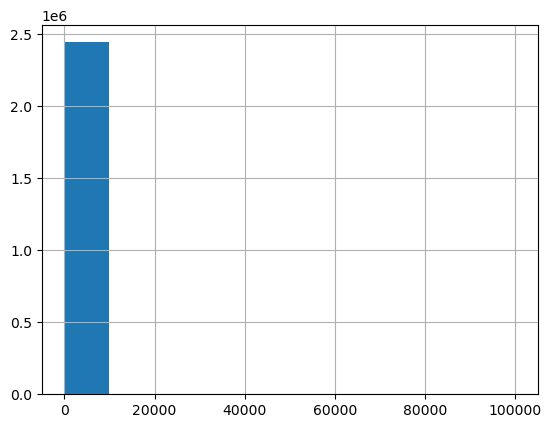

In [9]:
# Ploting the histogram
eda['price'].hist()

<Axes: >

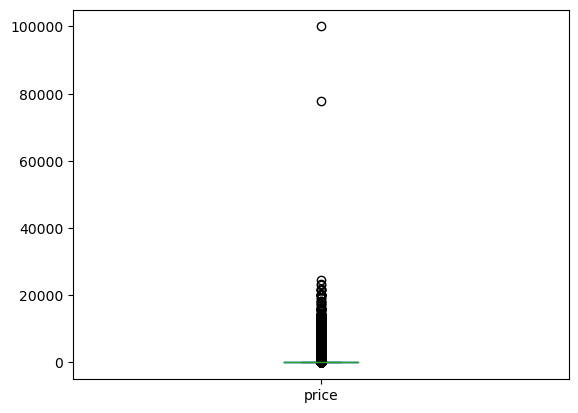

In [10]:
# Ploting the boxplot
eda['price'].plot.box()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [11]:
# Calculating the mean
mean_rating = eda['stars'].mean()
print(f'The Mean Rating is: {mean_rating}')

# Calculating the median
median_rating = eda['stars'].median()
print(f'The Median Rating is: {median_rating}')

# Calculating the mode
mode_rating = eda['stars'].mode()
print(f'The Mode Rating is: {mode_rating.loc[0]}')

The Mean Rating is: 2.152836472966065
The Median Rating is: 0.0
The Mode Rating is: 0.0


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [12]:
# Determining the variance
var_rating = eda['stars'].var()
print(f'The Variance Rating is: {var_rating}')

# Determining the standard deviation
standar_dev_rating =eda['stars'].std()
print(f'The Standard Deviation Rating is: {standar_dev_rating}')

# Determining the interquartile range
quantile_rating = eda['stars'].quantile(0.75) - eda['stars'].quantile(0.25)
print(f'The Interquartile Range is: {quantile_rating}')

The Variance Rating is: 4.81743402976196
The Standard Deviation Rating is: 2.1948653785054697
The Interquartile Range is: 4.4


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [13]:
# Calculating the skewness
skewness_rating = eda['stars'].skew()
print(f'The Skewness Rating is: {skewness_rating}')

# Calculating the kurtosis
kurtosis_rating = eda['stars'].kurtosis()
print(f'The Kurtosis Rating is: {kurtosis_rating}')

The Skewness Rating is: 0.08120735761080985
The Kurtosis Rating is: -1.9260061280432985


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

Text(0, 0.5, 'Frequency')

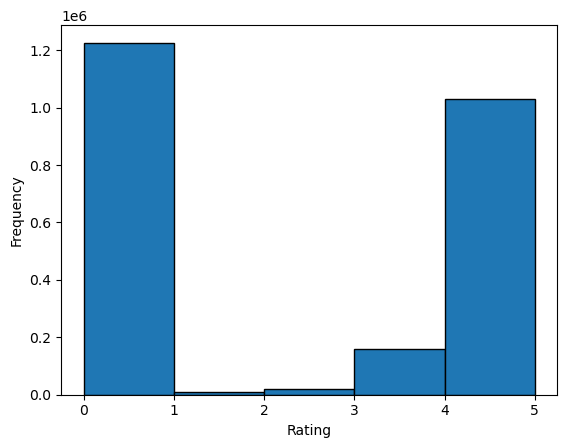

In [14]:
# Ploting the histogram
plt.hist(eda['stars'],bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')